# Estadística en la ingesta de datos

----------------------------

Todo lo anterior que hemos visto fue para aplicar estadística o identificar los puntos en donde la estadística descriptiva tiene usos concretos en el análisis exploratorio de datos, esto no quiere decir que el análisis exploratorio de datos se reduce solo a lo que se vio anteriormente, en realidad es mucho más amplio. Lo mismo va a suceder en esta nueva sección, lo que sigue es usar la estadística descriptiva para el procesamiento de datos **pre-modelo de machine learning** o cualquier tipo de modelo predictivo sobre el cual vayamos a procesar nuestros datos.

## Pipelines de procesamiento para variables numéricas

El primer proceso que usa estadística y que requiere de ello en el uso de datos numéricos.

### Escalamiento lineal
Hay una razón muy poderosa para **normalizar** o **escalamiento** los datos antes de pasarlos por un modelo de Machine Learning **¿cual es?**    
Resulta que los modelos de ML son eficientes porque los optimizadores que ellos usan o para los cuales están diseñados, son óptimos en la medida en que todos los atributos que consume ese modelo tienen las mismas dimensiones, entonces no tienen sentido que yo tenga un atributo que va de [0-1] y otro que va de [1,000,000-10,000,000], esto numéricamente hace insostenible el computo del optimizador, porque entonces no será rápida la convergencia y en algunos casos puede que no haya convergencia.

##### IMPORTANTE
- Así que los ML son eficientes en el rango de [-1,1], así que tenemos que transformarlos para que estén dentro de este rango.

Entonces también tenemos que tener en cuenta lo siguiente nosotros hablamos que los datos tienen distribución y esas distribuciones las usamos para referirnos al histograma visualmente (barras y su distribución) que tiene que ver con las frecuencias o las veces que ocurre un dato en un data set.

##### ¿Qué sucede aquí?   
  
Los diferentes tipos de **escalamiento** se usan de acuerdo a lo que tu quieras hacer con tu modelo realmente, pero los *escalamientos lineales* son cuando los datos típicamente están uniformemente distribuidos mas o menos, o que la data es simétrica. Como por ejemplo la distribución Gaussiana (la forma de campana), así que aquí es super importante tener en cuenta esto [ya sabemos hacer esto Visualización de boxplot, histograma, cuartiles, parámetros centrales]. Entonces ya que hicimos lo anterior podemos saber que si podemos aplicar un **escalamiento lineal** para tener datos en un rango en el que el *modelo* va a procesar los datos dentro de un performance adecuado o esperado.

Por lo que hay diferentes tipos de escalamiento.

#### Tipos
- Max-min
- Clipping
- Z-core
- Winsorizing
- Etc

#### ¿Cuando usarlos?
Cuando la Data es simétrica o uniformemente distribuida.

Vamos a suponer que tenemos una distribución normal y que los datos están entre $valor\; mínimo$ y un $valor\;máximo$, el problema viene cuando le digo a mi algoritmo de ML que tiene que optimizar con base a los atributos que se le están entregando, y entonces para que ese optimizador funcione adecuadamente, debemos asegurarnos que nuestros datos estén entre un rango razonable el cual suele ser $[-1 ,1]$

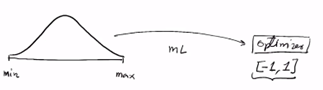    
A esto le llamamos **Escalamiento** o **Normalización**

### Min Max
Hacer una transformación de $X\rightarrow X_s$ donde $X_s=X(scale)$ y así $X_s\in [-1,1]$. Así la transformación $min-max$ es la siguiente:
$$X_s=\frac{2X-min-max}{max-min}$$
Donde:
- $min=$ Valor mínimo dentro del conjunto de datos
- $max=$ Valor máximo dentro del conjunto de datos

### Clipping
Otro tipo de escalamiento es **clipping** aunque no es muy recomendado. Clipping básicamente es:
- Tomamos nuestros datos y establecemos un limite superior $\oplus$ y un limite inferior $\ominus$ que está marcado en rojo, mientras la zona verde ellos se van a ver colapsados o forzados a los limites que les correspondan. [Es decir cualquier número por encima del limite superior va a adquirir el valor del limite superior, caso contrario cualquier numero por debajo del limite inferior va a adquirir el valor del limite inferior]. 

Lo que se hace es forzar a que los datos queden en los extremos de la distribución.  
Veamos si es mejor la ilustración gráfica

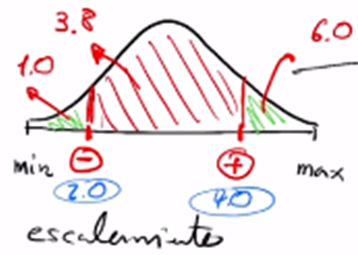
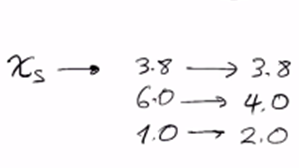

##### IMPORTANTE      
Estos valores se pueden ajustar de manera arbitraria o por medio de percentiles.     
Ejemplo: Cuando usamos los percentiles en los extremos limites y así escoger la mayoría de los datos es cuando el método de **clipping** se llama **Winsorizing**, este es un caso particular de **clipping**.      
En resumen no es un modelo fiable porque estas omitiendo datos que pueden ser útiles y funcionan, incluso si son datos **outliers**, mas si son datos correctos.

### Z-Score
Este método esta basado en la definición de **promedio** y **desviación estándar**. Entonces decimos que yo tengo un conjunto de datos $$\{X_1,X_2,...,X_n \}\rightarrow \mu \sigma$$ es decir les calculo el promedio y la desviación estándar, también vamos a asumir que tienen un distribución perfectamente simétrica Gaussiana. Entonces la **normalización Z-Score** la calculo como sigue:
$$X_s=\frac{X-\mu} {\sigma}$$
De esta manera ya estoy asegurando que los datos van a estar dentro de un rango razonable, aunque puede que existan rango que queden fuera.     

Cuando nosotros transformamos hacemos una distribución que sigue siendo normal pero que tiene un promedio=0 $\mu=0$ y una desviación estándar de 1 $\sigma=1$. Esto hace que los datos se ajusten, no todos pero si por lo menos la gran mayoría al intervalo $[-1.1]$ que es el ideal para los algoritmos de Machine Learning.

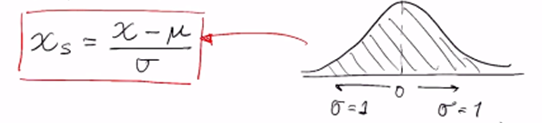


## Resumen
Así de manera sencilla vemos que existen diferentes maneras de normalizar los datos. Un escalamiento lineal es una función lineal, simplemente transforma unos números en otros, de manera que el rango original que contiene todos los datos (pensemos como el rango de dispersión $máximo-mínimo$) se transforma asi mismo por medio del **escalamiento** o **normalización**, de manera que se ajusta a lo que los modelos de Machine Learning requieren; es decir un rango de $[-1,1]$ por poner un ejemplo. Hay otros que pueden tener otro rango, pero $[-1,1]$ es el estándar y esto es lo que normalmente hay que hacer en la parte de preprocesamiento.

En la proxima clase veremos que vamos a hacer cuando los datos no son simétricos, es decir no tienen una distribución uniforme.

## Extra 

#### Normalización
La normalización es una técnica que a menudo se aplica como parte de la preparación de datos para el aprendizaje automático. El objetivo de la normalización es cambiar los valores de las columnas numéricas en el conjunto de datos para usar una escala común, sin distorsionar las diferencias en los rangos de valores ni perder información. La normalización también es necesaria para que algunos algoritmos modelen los datos correctamente. . Por ejemplo, suponga que su conjunto de datos de entrada contiene una columna con valores que van de 0 a 1 y otra columna con valores que van de 10,000 a 100,000. La gran diferencia en la escala de los números podría causar problemas al intentar combinar los valores como características durante el modelado. . La normalización evita estos problemas al crear nuevos valores que mantienen la distribución general y las proporciones en los datos de origen, mientras mantienen los valores dentro de una escala aplicada en todas las columnas numéricas utilizadas en el modelo. .

Tenemos varias opciones para transformar datos numéricos:
Cambiar todos los valores a una escala de 0 a 1 o transformar los valores representándolos como rangos de percentiles en lugar de valores absolutos.    
Aplicar la normalización a una sola columna o a varias columnas en el mismo conjunto de datos.     
Si necesita repetir el experimento o aplicar los mismos pasos de normalización a otros datos, puede guardar los pasos como una transformación de normalización y aplicarlos a otros conjuntos de datos que tengan el mismo esquema.  

**Nota importante:** Algunos algoritmos requieren que los datos se normalicen antes de entrenar un modelo. Otros algoritmos realizan su propia normalización o escalado de datos.

### Pipeline
Una pequeña definición de pipeline que encontré en un libro de Ingeniería de datos con Python:

> La combinación de una base de datos transaccional, un lenguaje de programación, un motor de procesamiento y un almacén de datos da como resultado un pipeline. - Data Engineering with Python. Packtpub


Básicamente Pipeline, como su traducción al castellano es Tubería, donde dentro de esta tubería vemos los diferentes subprocesos de DS Dejo esta imagen y un link donde explica Pipeline para DS, esta en ingles Pipeline.

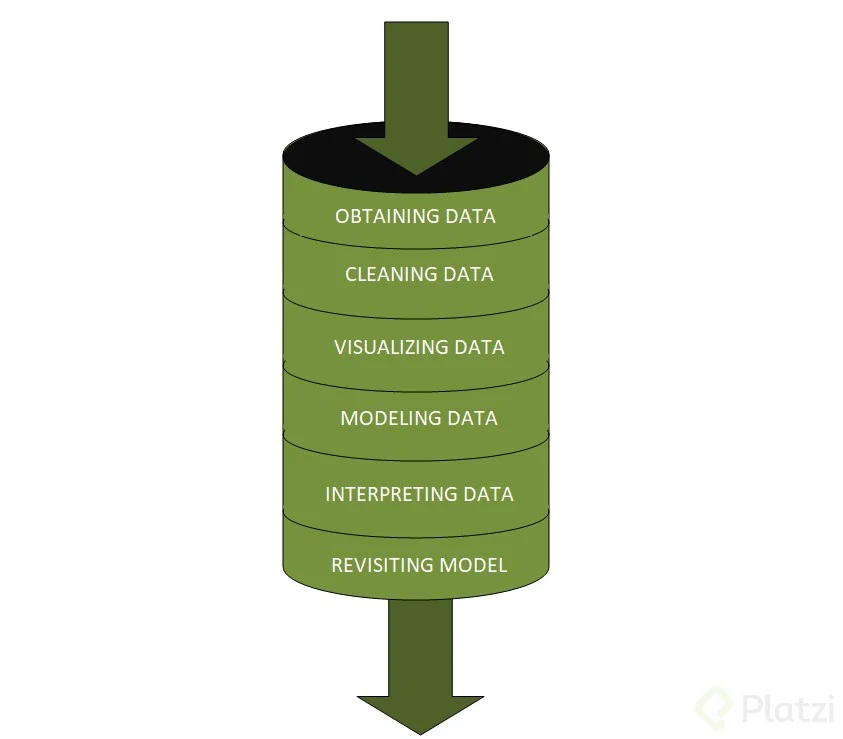

### ¿Qué es una Pipeline de Datos?

- Una pipeline de datos es una construcción lógica que representa un proceso dividido en fases. Las pipelines de datos se caracterizan por definir el conjunto de pasos o fases y las tecnologías involucradas en un proceso de movimiento o procesamiento de datos.

- Las pipelines de datos son necesarias ya que no debemos analizar los datos en los mismos sistemas donde se crean. El proceso de analítica es costoso computacionalmente, por lo que se separa para evitar perjudicar el rendimiento del servicio. De esta forma, tenemos sistemas OLTP, encargados de capturar y crear datos, y sistemas OLAP, encargados de analizar los datos.

- Por ejemplo, un sistema OLTP puede ser un CRM, mientras que un sistema OLAP será un Data Warehouse.

### Ejemplo de Pipeline de Datos

- Como ejemplo, podemos pensar en las APIs de ingesta para obtener los datos. Esta API es el punto de partida, y podría enviar los datos a un topic de Apache Kafka. Kafka actúa aquí como un buffer para el siguiente paso.

- Después, una tecnología de procesamiento, que puede ser streaming o batch, leerá los datos de nuestro buffer. Por ejemplo, Apache Spark realizará analítica sobre estos datos.

- Por último, la pipeline termina con el resultado almacenado de forma persistente en una base de datos como HBase o en un sistema de ficheros distribuido como HDFS.

- Una vez que nuestros datos están persistidos se encuentran listos para ser usados. Podríamos implementar una aplicación web que muestra estos datos en un dashboard como Grafana o consultarlos con herramientas de visualización y BI.


### Pipelines de procesamiento de datos numéricos
Los **Pipelines de procesamiento de datos numéricos **son secuencias de etapas o pasos que se utilizan para preparar y transformar datos numéricos para su análisis. Estos pipelines suelen incluir tareas como la limpieza de datos, la imputación de valores faltantes, la normalización y la selección de características.

Algunos ejemplos de tareas comunes que se pueden incluir en uin pipeline de procesamiento de datos numéricos son:

- Limpieza de datos: eliminación de valores atípicos, eliminación de valores faltantes, corrección de errores de entrada de datos.
- Imputación de valores faltantes: reemplazo de calores faltantes con estimaciones basadas en otros datos disponibles.
- Normalización: trasformación de datos para que estén en la misma escala.
- Selección de características: selección de las variables más relevantes para el análisis.
- Reducción de dimensionalidad: reducción del número de variables mediante la eliminación de redundancias o la combinación de variables.
- Discretización: trasformación de variables continuas en categorías discretas.

### Normalización
La normalización es un proceso de transformación de datos que se utiliza para ajustar los valores de diferentes variables para que estén en la misma escala. Esto se hace a menudo para poder comparar y analizar los datos de manera más sencilla.

## Enlaces
- [Escalamiento de datos](https://interactivechaos.com/es/manual/tutorial-de-machine-learning/escalado-de-datos)
- [Normalization](https://developers.google.com/machine-learning/data-prep/transform/normalization)